In this tutorial we are going to see the similarity between two images. There are lot of application coming in next series of tutorials based on this similarity

Applications going to be designed are:


1) cardless entry into offices (Designing the IOT system too with a small database) 


2) clothes similarity if the user selects a part of the image and asks for recommendations 

These applications are sample and more applications are going to be designed in the coming months

Importing the basic dependecies which and the two images with which we need to see the similarity.

In [22]:
import tensorflow as tf
import cv2
from tensorflow.python.keras.preprocessing import image
import numpy as np
from scipy import spatial
keras = tf.keras
in_preprocess = keras.applications.vgg16.preprocess_input
img = r'C:\Users\jatoth.kumar\Downloads\kagglecatsanddogs_3367a\PetImages\Cat\6.jpg'
img_new = r'C:\Users\jatoth.kumar\Downloads\kagglecatsanddogs_3367a\PetImages\Cat\7.jpg'

We are going to see the img,img_new similarity you can see the two images loaded below

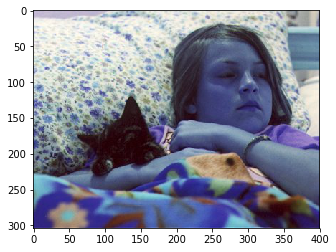

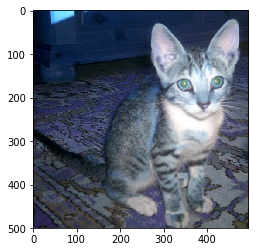

In [24]:
import matplotlib.pyplot as plt
img_arr,img_arr1 = cv2.imread(img),cv2.imread(img_new)
plt.imshow(img_arr)
plt.show()
plt.imshow(img_arr1)
plt.show()

We are going to load the keras functions which are used to construct a CNN architecture. Tensorflow is supporting the keras library and it is pretty easy to work with keras. Tensorboard support is also provided with keras. We will also see how to load the summaries into Tensorboard which are generated in keras

In [25]:
#CNN variables
sequential = keras.Sequential
cnn = keras.layers.Conv2D
dense = keras.layers.Dense
dropout = keras.layers.Dropout
flat = keras.layers.Flatten
activation = keras.layers.Activation
maxpool = keras.layers.MaxPool2D

Building the CNN Architecture with three layers (layer -> Conv2D+maxpool) followed by a flattening layer which we output at last for each image

In [26]:
#build the cnn model
model = sequential()

model.add(cnn(32,(3,3),padding='same',activation='relu',input_shape=(415,500,3)))
model.add(cnn(32,(19,19)))
model.add(dropout(0.2))
model.add(maxpool(2,2))

model.add(cnn(32,(3,3),padding='same',activation='relu'))
model.add(cnn(32,(19,19)))
model.add(dropout(0.2))
model.add(maxpool(2,2))

model.add(cnn(16,(3,3),padding='same',activation='relu'))
model.add(cnn(8,(31,31)))
model.add(maxpool(2,2))
# model.add(dense)
model.add(flat())

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 415, 500, 32)      896       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 397, 482, 32)      369696    
_________________________________________________________________
dropout_5 (Dropout)          (None, 397, 482, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 198, 241, 32)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 198, 241, 32)      9248      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 180, 223, 32)      369696    
_________________________________________________________________
dropout_6 (Dropout)          (None, 180, 223, 32)      0         
__________

Here we are going to input the model with the two images as input and get the final vector with which we see the cosine similarity. First we will load the image then expand it's dimesions to the shape of (415,500,3). 

In [29]:
def img_reshaping(img):
    img1 = image.load_img(img,target_size=(415,500))
    img_data = image.img_to_array(img1)
    img_data = np.expand_dims(img_data,axis=0)
    img_data = in_preprocess(img_data)
    return img_data
img_data = img_reshaping(img)
img_new_data = img_reshaping(img_new)
img_vector = model.predict(img_data)
img1_vector = model.predict(img_new_data)
print(img_vector.shape,img1_vector.shape)
print('The similarity between img1 and img2 is %s'%(1-spatial.distance.cosine(img_vector,img1_vector)))
print('The similarity between img1 and img1 is %s'%(1-spatial.distance.cosine(img_vector,img_vector)))
print('The similarity between img2 and img2 is %s'%(1-spatial.distance.cosine(img1_vector,img1_vector)))


(1, 9600) (1, 9600)
The similarity between img1 and img2 is 0.38061800599098206
The similarity between img1 and img1 is 1.0
The similarity between img2 and img2 is 1.0


As the results come we can see the similarity scores between the same images is same and between the two images is 0.38 which is very low as the images differ a lot. You can try by giving your own path in the img and img1 places and see the results.